In [1]:
peliculas=["Origen (2010) Estados Unidos",
            "Joker (2019) Estados Unidos",
            "Avatar (2009) Estados Unidos",
            "El caballero oscuro (2008) Estados Unidos",
            "Malditos bastardos (2009) Estados Unidos",
            "Interstellar (2014) Estados Unidos",
            "Cisne negro (2010) Estados Unidos",
            "Gran Torino (2008) Estados Unidos",
            "Slumdog Millionaire (2008) Reino Unido",
            "Django desencadenado (2012) Estados Unidos",
            "Infiltrados (2006) Estados Unidos",
            "El secreto de sus ojos (2009) Argentina",
            "Match Point (2005) Reino Unido",
            "Up (2009) Estados Unidos",
            "WALL-E (2008) Estados Unidos",
            "Celda 211 (2009) España",
            "La vida de los otros (2006) Alemania",
            "Shutter Island (2010) Estados Unidos",
            "Crash (Colisión) (2004) Estados Unidos",
            "Toy Story 3 (2010) Estados Unidos"]

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from random import randint, uniform,random

edad = ctrl.Antecedent(np.arange(18, 71, 1), 'edad')
manejo = ctrl.Antecedent(np.arange(0, 101, 1), 'manejo')
riesgo = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo')

riesgo['bajo'] = fuzz.trimf(riesgo.universe, [0, 10, 20])
riesgo['medio'] = fuzz.trimf(riesgo.universe, [10, 30, 45])
riesgo['alto'] = fuzz.trimf(riesgo.universe, [40, 55, 100])

manejo['bajo'] = fuzz.trimf(manejo.universe, [0, 10, 20])
manejo['medio'] = fuzz.trimf(manejo.universe, [10, 40, 60])
manejo['alto'] = fuzz.trimf(manejo.universe, [50, 70, 100])

edad['joven'] = fuzz.trimf(edad.universe, [18, 25, 30])
edad['adulto'] = fuzz.trimf(edad.universe, [20, 35, 50])
edad['mayor'] = fuzz.trimf(edad.universe, [40, 60, 70])

C:\Users\Bryam\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


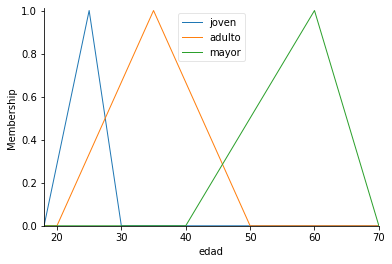

In [3]:
edad.view()

C:\Users\Bryam\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


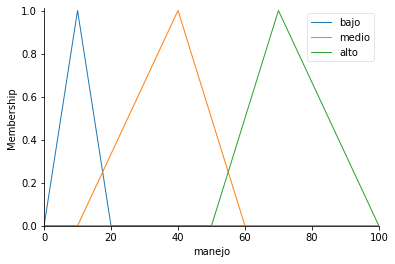

In [4]:
manejo.view()

C:\Users\Bryam\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


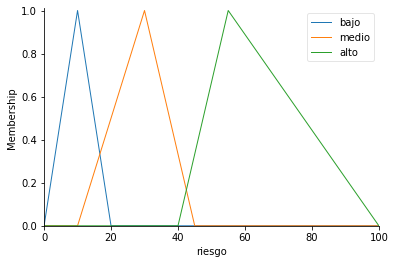

In [5]:
riesgo.view()

In [6]:
regla1 = ctrl.Rule(manejo['bajo'] and edad['joven'], riesgo['medio'])
regla2 = ctrl.Rule(manejo['medio'] and edad['joven'], riesgo['alto'])
regla3 = ctrl.Rule(manejo['alto'] and edad['joven'], riesgo['alto'])

regla4 = ctrl.Rule(manejo['bajo'] and edad['adulto'], riesgo['bajo'])
regla5 = ctrl.Rule(manejo['medio'] and edad['adulto'], riesgo['medio'])
regla6 = ctrl.Rule(manejo['alto'] and edad['adulto'], riesgo['alto'])

regla7 = ctrl.Rule(manejo['bajo'] and edad['mayor'], riesgo['medio'])
regla8 = ctrl.Rule(manejo['medio'] and edad['mayor'], riesgo['alto'])
regla9 = ctrl.Rule(manejo['alto'] and edad['mayor'], riesgo['alto'])

regla10 = ctrl.Rule(edad['joven'] and manejo['bajo'], riesgo['medio'])
regla11 = ctrl.Rule(edad['joven'] and manejo['medio'], riesgo['alto'])
regla12 = ctrl.Rule(edad['joven'] and manejo['alto'], riesgo['alto'])

regla13 = ctrl.Rule(edad['adulto'] and manejo['bajo'], riesgo['bajo'])
regla14 = ctrl.Rule(edad['adulto'] and manejo['medio'], riesgo['medio'])
regla15 = ctrl.Rule(edad['adulto'] and manejo['alto'], riesgo['alto'])

regla16 = ctrl.Rule(edad['mayor'] and manejo['bajo'], riesgo['medio'])
regla17 = ctrl.Rule(edad['mayor'] and manejo['medio'], riesgo['alto'])
regla18 = ctrl.Rule(edad['mayor'] and manejo['alto'], riesgo['alto'])

In [7]:
riesgo_ctrl = ctrl.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla6,regla7,regla8,regla9
                                 ,regla10,regla11,regla12,regla13,regla14,regla15,regla16,regla17,regla18])

In [8]:
riesgos = ctrl.ControlSystemSimulation(riesgo_ctrl)

In [9]:
from neo4j import GraphDatabase

class Neo4jService(object):

    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()
    
    def crear_nodo(self, tx, nombre,riesgo):
        tx.run("CREATE (persona:Persona {nombre: $nombre, riesgo: $riesgo})",nombre=nombre, riesgo=riesgo)
        
    def crear_pelicula(self, tx, nombre,riesgo):
        tx.run("CREATE (pelicula:Pelicula {nombre: $nombre, riesgo: $riesgo})",nombre=nombre, riesgo=riesgo)
        
    def recomendacion(self,tx):
        result = tx.run("CALL gds.beta.knn.stream('Recomendacion', {\n"
                            "topK: 1,\n"
                            "nodeWeightProperty: 'riesgo',\n"
                            "randomSeed: 42,\n"
                            "concurrency: 1,\n"
                            "sampleRate: 1.0,\n"
                            "deltaThreshold: 0.0\n"
                        "})\n"
                        "YIELD node1, node2, similarity\n"
                        "RETURN gds.util.asNode(node1).nombre AS Persona, gds.util.asNode(node2).nombre AS Pelicula, similarity")
        for record in result:
            r1=(record["Persona"])
            r2=(record["Pelicula"])
            r3=(record["similarity"])
            if r1 == nombre.get() or r2==nombre.get():
                resultado.insert(tk.END, "\nEl Nodo "+r2+" tiene mas similitud con el nodo "+r1)
                
            
    def recomendacionPer(self,tx):
        result = tx.run("CALL gds.beta.knn.stream('Recomendacion', {\n"
                            "topK: 1,\n"
                            "nodeWeightProperty: 'riesgo',\n"
                            "randomSeed: 42,\n"
                            "concurrency: 1,\n"
                            "sampleRate: 1.0,\n"
                            "deltaThreshold: 0.0\n"
                        "})\n"
                        "YIELD node1, node2, similarity\n"
                        "RETURN gds.util.asNode(node1).nombre AS Persona, gds.util.asNode(node2).nombre AS Pelicula, similarity")
        for record in result:
            r1=(record["Persona"])
            r2=(record["Pelicula"])
            r3=(record["similarity"])
            print ("El nodo "+r1+" tiene mas relacion con el nodo "+r2+" con una similitud de "+str(r3))

In [12]:
p=1
neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'expertos')
with neo4j._driver.session() as session:
    for i in (np.arange(0, 100, 1)):
        nom="persona"+str(p)
        riesgos.input['edad'] = randint(18,70)
        riesgos.input['manejo'] = randint(1,100)
        riesgos.compute()
        s=float(riesgos.output['riesgo'])
        session.write_transaction(neo4j.crear_nodo , nom,s)
        p=p+1

In [13]:
neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'expertos')
with neo4j._driver.session() as session:
    for i in peliculas:
        peli=i
        riesgo = float(randint(1,100))
        session.write_transaction(neo4j.crear_pelicula , peli,riesgo)

In [18]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import tkinter as tk

raiz = Tk()


def clearTextInput():
    resultado.delete("1.0","end")
        
def crear():
    neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'expertos')
    with neo4j._driver.session() as session:
        session.write_transaction(neo4j.crear_nodo , nombre.get(),float(dif.get()))
        
def buscar():
    neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'expertos')
    with neo4j._driver.session() as session:
        session.read_transaction(neo4j.recomendacion)

def logica():
    riesgos.input['manejo'] = float(manejo.get())
    riesgos.input['edad'] = float(edad.get())
    riesgos.compute()
    dif.insert (tk.END, str(riesgos.output['riesgo']))
    print(riesgos.output['riesgo'])
    riesgo.view(sim=riesgos)
    


raiz.geometry('600x525')  # anchura x altura

raiz.title('Examen SE')
Label(raiz, text="Examen SE").place(x=230, y=0)

Label(raiz, text="Nombre del la Persona:").place(x=130, y=50)

nombre=ttk.Entry(raiz)
nombre.place(x=267, y=50)

Label(raiz, text="Edad:").place(x=130, y=90)

edad=ttk.Entry(raiz)
edad.place(x=267, y=90)

Label(raiz, text="% Manejo:").place(x=130, y=130)

manejo=ttk.Entry(raiz)
manejo.place(x=267, y=130)

Label(raiz, text="Logica Difusa:").place(x=200, y=500)

dif=ttk.Entry(raiz)
dif.place(x=300, y=500)


ttk.Button(raiz, text='Lógica Difusa', command=logica).place(x=150, y=165)
ttk.Button(raiz, text='Guardar',command=crear).place(x=250, y=165)
ttk.Button(raiz, text='Recomendacion',command=buscar).place(x=350, y=165)

resultado = Text(raiz)
resultado.place(x = 10, y=200, width=580, height=275)

raiz.mainloop()

In [16]:
neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'expertos')
with neo4j._driver.session() as session:
    session.read_transaction(neo4j.recomendacionPer)

El nodo persona1 tiene mas relacion con el nodo persona19 con una similitud de 1.0
El nodo persona2 tiene mas relacion con el nodo Match Point (2005) Reino Unido con una similitud de 0.6704092720028672
El nodo persona3 tiene mas relacion con el nodo persona26 con una similitud de 0.9267756111728471
El nodo persona4 tiene mas relacion con el nodo persona27 con una similitud de 1.0
El nodo persona5 tiene mas relacion con el nodo persona51 con una similitud de 0.8565737797575276
El nodo persona6 tiene mas relacion con el nodo persona80 con una similitud de 0.9773705121349944
El nodo persona7 tiene mas relacion con el nodo persona59 con una similitud de 1.0
El nodo persona8 tiene mas relacion con el nodo persona48 con una similitud de 0.7914594479714366
El nodo persona9 tiene mas relacion con el nodo persona20 con una similitud de 0.9966506156049141
El nodo persona10 tiene mas relacion con el nodo persona63 con una similitud de 1.0
El nodo persona11 tiene mas relacion con el nodo persona20